In [1]:
import nbimporter
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from Funciones import CV

from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv("datos_limpios_acp")
df = df.drop(['Unnamed: 0'], axis = 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   90s         1248 non-null   float64
 1   SCA         1248 non-null   float64
 2   SCA90       1248 non-null   float64
 3   PassLive    1248 non-null   float64
 4   PassDead    1248 non-null   float64
 5   Sh          1248 non-null   float64
 6   Fld         1248 non-null   float64
 7   Def         1248 non-null   float64
 8   GCA         1248 non-null   float64
 9   GCA90       1248 non-null   float64
 10  PassLive.1  1248 non-null   float64
 11  PassDead.1  1248 non-null   float64
 12  Sh.1        1248 non-null   float64
 13  Fld.1       1248 non-null   float64
 14  Def.1       1248 non-null   float64
 15  Rk.1        1248 non-null   float64
 16  90s.1       1248 non-null   float64
 17  Tkl         1248 non-null   float64
 18  TklW        1248 non-null   float64
 19  Def 3rd     1248 non-null  

In [4]:
#ACP
from sklearn.decomposition import PCA

#Quitamos columnas no numericas y columnas con muchos nan para no perder tantos datos
Y = df['VAL']
X = df.drop(['VAL'],axis = 1)

pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)
X_reduced = pd.DataFrame(X_reduced)
X_reduced['VAL'] = Y

In [5]:
pca.explained_variance_ratio_

array([0.41146634, 0.15671575, 0.05394574, 0.04938136, 0.04082437,
       0.02691708, 0.02296559, 0.02248183, 0.0215116 , 0.01797544,
       0.01637844, 0.01375182, 0.01334893, 0.01174974, 0.01024534,
       0.00907141, 0.00868219, 0.00831042, 0.0074702 , 0.0067463 ,
       0.00582124, 0.00520807, 0.00485877, 0.00479244])

In [6]:
X_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,VAL
0,1.154902,6.697862,4.190885,3.934623,-2.551136,1.620028,3.117222,2.295447,0.738121,-2.059940,...,-0.688948,1.058973,0.406132,-1.018599,-0.938202,0.064300,0.747147,0.836610,-0.313494,83
1,-6.834173,1.523848,-0.452237,3.516425,0.408631,1.264399,1.334369,0.030294,-0.099693,0.464811,...,0.046431,-0.781389,-1.066324,0.064653,0.165205,-0.780572,-0.525212,0.692964,-0.252419,73
2,-7.652709,-0.220216,-0.723709,3.325955,0.733403,-0.140244,-0.117783,0.569758,-0.055162,-1.261108,...,0.421633,-0.817909,0.773334,-0.072455,-0.268801,-0.063890,-0.044222,-0.032408,-0.082127,63
3,13.316366,-1.895063,-3.173858,2.919715,2.582860,1.418890,2.437824,-3.073561,5.216059,-4.608793,...,1.104819,-0.582137,-0.421671,1.135467,-0.417140,-1.445958,1.059265,0.008708,-0.386740,87
4,3.816830,-6.024508,0.201275,3.133235,0.901612,0.748063,2.619779,-1.658831,3.256762,-2.070229,...,0.173351,-0.301004,0.847803,-1.038437,0.672967,-0.803468,-0.543800,0.016691,2.094426,76


In [7]:
#REGRESION LINEAL
lin_reg = LinearRegression()
print(CV(df,10))
df = df.drop(['is_train'], axis = 1)

4.705561219972802


In [8]:
X_train, X_test = train_test_split(X_reduced, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train_1 = Y_train.values
Y_test_1 = Y_test.values
X_train_1 = X_train.values
X_test_1 = X_test.values
lin_reg.fit(X_train_1,Y_train_1) #hago la regresion
Y_prediction = lin_reg.predict(X_test_1)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

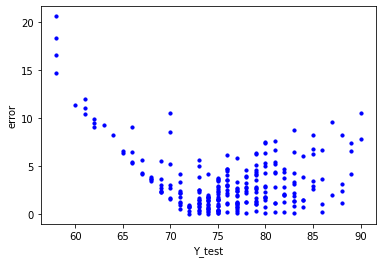

In [9]:
#error según la valoracion
df_er = pd.DataFrame([Y_test_1, Y_prediction], index = None)
df_er.index = ['Y_test', 'Y_prediction']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['Y_prediction'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [10]:
df_er['error'].mean()

3.347745104126559

In [11]:
##########################################################################
######## REGRESION LINEAL CON VAL > 70 ##########
###########################################################################

In [12]:
#Veamos si quedandonos con datos por encima de 70 se arregla la cosa
df1 = df[df['VAL']> 69]

In [13]:
#Quitamos jugadores con datos NaN
df1 = df1.dropna()

X_train, X_test = train_test_split(df1, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

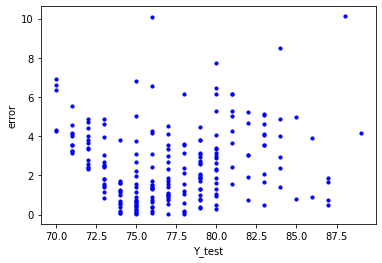

In [14]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [15]:
df_er['error'].mean()

2.5666247414578702

In [16]:
##########################################################################
######## REGRESION LINEAL CON JUGADORES QUE JUEGAN MINUTOS ##########
###########################################################################

In [17]:
df['90s'].quantile([0.25,0.5,0.75])
df2 = df[df['90s']> -0.929330] #-0.929330 es el primer cuantil

In [18]:
#Quitamos jugadores con datos NaN
df2 = df2.dropna()

X_train, X_test = train_test_split(df2, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

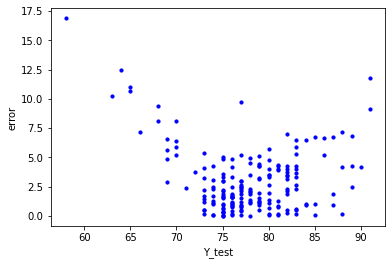

In [19]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [20]:
df_er['error'].mean()

2.998623288402665

In [21]:
##########################################################################
######## REGRESION LINEAL CON VAL > 69 Y 90S > 6 #########################
##########################################################################

In [22]:
#Combinacion de las anteriores
df3 = df[df['90s']> -0.929330] #-0.929330 es el primer cuantil
df3 = df3[df3['VAL']>69]

In [23]:
#Quitamos jugadores con datos NaN
df3 = df3.dropna()

X_train, X_test = train_test_split(df3, test_size=0.2, random_state=0)

Y_train = X_train['VAL']
Y_test = X_test['VAL']
X_train = X_train.drop(['VAL'],axis = 1)
X_test = X_test.drop(['VAL'],axis = 1)
Y_train = Y_train.values
Y_test = Y_test.values
X_train = X_train.values
X_test = X_test.values
lin_reg.fit(X_train,Y_train) #hago la regresion
Y_prediction = lin_reg.predict(X_test)#predigo

<AxesSubplot:xlabel='Y_test', ylabel='error'>

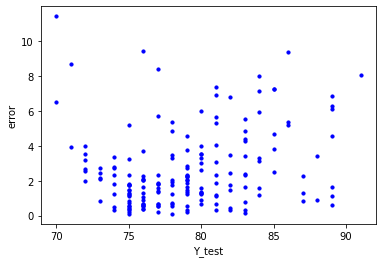

In [24]:
#error según la valoracion
df_er = pd.DataFrame([Y_test, lin_reg.predict(X_test)], index = None)
df_er.index = ['Y_test', 'yhat_test']
df_er = df_er.transpose()
df_er['error'] = abs(df_er['Y_test'] - df_er['yhat_test'])
df_er.plot.scatter(x = 'Y_test', y = 'error', s = 10, c = 'blue' )

In [25]:
df_er['error'].mean()

2.6171475618199675